## Task 3- Iris flower classification

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.shape

(150, 5)

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 1. Check for null values

In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### if there are any null values then perform Data cleaning
### since in this data set there are no null values we'll proceed further

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Check outliers

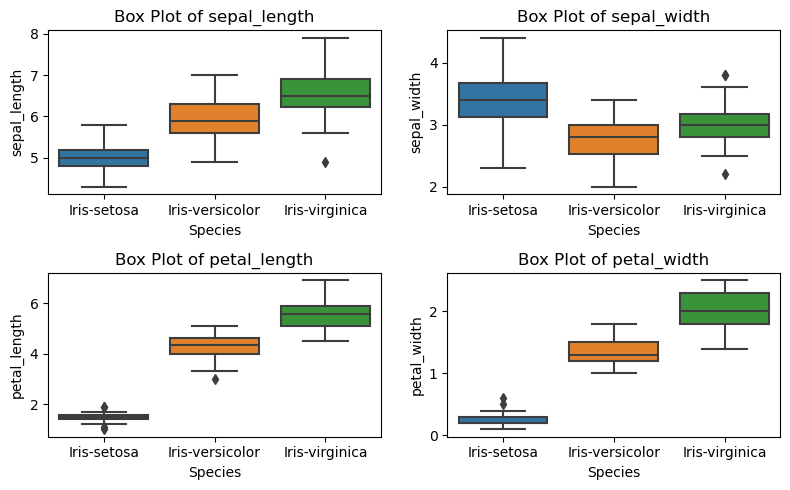

In [9]:
plt.figure(figsize=(8,5))

att=['sepal_length','sepal_width','petal_length', 'petal_width']

for i, column in enumerate(att):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df, x='species', y=column)
    plt.title('Box Plot of '+column)
    plt.xlabel('Species')
    plt.ylabel(column)
plt.tight_layout()
plt.show()
    

## Visualisation

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

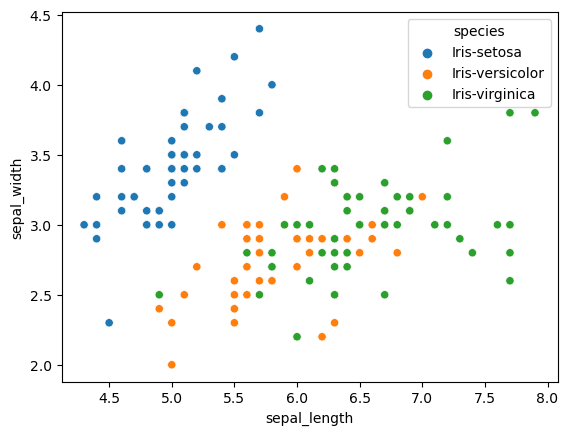

In [10]:
sns.scatterplot(df,x='sepal_length', y='sepal_width', hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

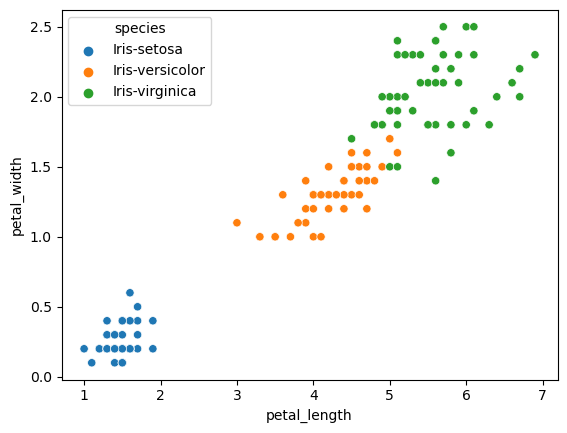

In [11]:
sns.scatterplot(df,x='petal_length', y='petal_width', hue='species')

### Now we shall define x

In [12]:
X=df.iloc[:,:-1]

In [13]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
y=df.iloc[:,-1]

In [15]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 45)

In [17]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [18]:
classifier

LogisticRegression()

In [19]:
from sklearn.model_selection import GridSearchCV

parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40]}

In [20]:
classifier_regressor=GridSearchCV(classifier, param_grid=parameter, scoring='accuracy',cv=5)

In [21]:
classifier_regressor.fit(X_train,y_train)

/Users/ginnyshai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ginnyshai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/ginnyshai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ginnyshai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/ginnyshai/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan 0.95494071        nan        nan 0.95494071        nan
        nan 0.95494071        nan        nan 0.96403162        nan
        nan 0.96403162        nan        nan 0.96403162        nan
        nan 0.96403162        nan        nan 0.96403162        nan
        nan 0.96403162        nan        nan 0.95494071        nan]
  warnings.warn(
/Users/ginnyshai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [22]:
print(classifier_regressor.best_params_)

{'C': 4, 'penalty': 'l2'}


In [23]:
print(classifier_regressor.best_score_)

0.9640316205533598


In [24]:
y_pred=classifier_regressor.predict(X_test)

In [25]:
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [26]:
y_test

0          Iris-setosa
43         Iris-setosa
129     Iris-virginica
3          Iris-setosa
34         Iris-setosa
44         Iris-setosa
38         Iris-setosa
105     Iris-virginica
123     Iris-virginica
140     Iris-virginica
28         Iris-setosa
125     Iris-virginica
113     Iris-virginica
103     Iris-virginica
133     Iris-virginica
35         Iris-setosa
145     Iris-virginica
142     Iris-virginica
40         Iris-setosa
87     Iris-versicolor
84     Iris-versicolor
85     Iris-versicolor
115     Iris-virginica
51     Iris-versicolor
4          Iris-setosa
112     Iris-virginica
92     Iris-versicolor
64     Iris-versicolor
10         Iris-setosa
91     Iris-versicolor
76     Iris-versicolor
96     Iris-versicolor
119     Iris-virginica
101     Iris-virginica
25         Iris-setosa
137     Iris-virginica
13         Iris-setosa
26         Iris-setosa
Name: species, dtype: object

In [27]:
from sklearn.metrics import accuracy_score, classification_report 

In [28]:
score=accuracy_score(y_pred, y_test)

In [29]:
score

0.9473684210526315

In [32]:
print(classification_report(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.82      0.90        11
 Iris-virginica       0.87      1.00      0.93        13

       accuracy                           0.95        38
      macro avg       0.96      0.94      0.94        38
   weighted avg       0.95      0.95      0.95        38



In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

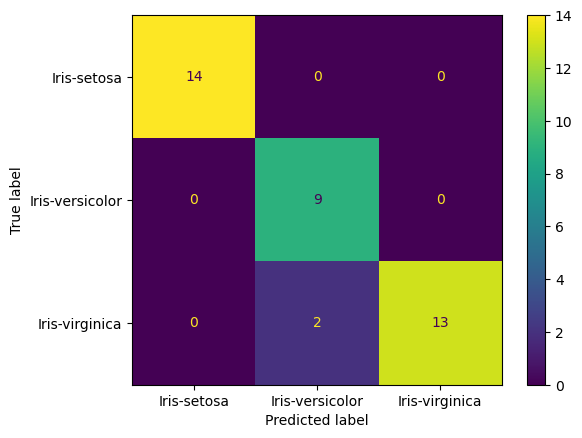

In [35]:
ConfusionMatrixDisplay.from_estimator(classifier_regressor, X_test,y_test)